In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver. Chrome(service=Service(ChromeDriverManager().install()))

driver.get("https://quotes.toscrape.com/js/")

In [24]:
from selenium.webdriver.common.by import By

quotes = driver.find_elements(By.CLASS_NAME, "quote")

for quote in quotes:
    text = quote.find_element(By.CLASS_NAME, "text").text # text, author, tag
    author = quote.find_element(By.CLASS_NAME, "author").text
    tags = quote.find_elements(By.CLASS_NAME, "tag")
    tags_text = [tag.text for tag in tags]
    
    print(f" \"{text}\" - {author} / tags: {', '.join(tags_text)}")

 "“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”" - Albert Einstein / tags: change, deep-thoughts, thinking, world
 "“It is our choices, Harry, that show what we truly are, far more than our abilities.”" - J.K. Rowling / tags: abilities, choices
 "“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”" - Albert Einstein / tags: inspirational, life, live, miracle, miracles
 "“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”" - Jane Austen / tags: aliteracy, books, classic, humor
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”" - Marilyn Monroe / tags: be-yourself, inspirational
 "“Try not to become a man of success. Rather become a man of value.”" - Albert Einstein / tags: adulthood, success, value
 "“It is better to be hate

In [35]:
# print(quotes[0].text)
for quote in quotes:
    spans = quote.find_elements(By.TAG_NAME, "span")
    text = spans[0].text
    author = spans[1].text
    tags_list = []
    aas = quote.find_elements(By.TAG_NAME, "a")
    for a in aas:
        tags_list.append(a.text)
    print(f" \"{text}\" - {author} / tags: {', '.join(tags_list)}")

 "“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”" - by Albert Einstein / tags: change, deep-thoughts, thinking, world
 "“It is our choices, Harry, that show what we truly are, far more than our abilities.”" - by J.K. Rowling / tags: abilities, choices
 "“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”" - by Albert Einstein / tags: inspirational, life, live, miracle, miracles
 "“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”" - by Jane Austen / tags: aliteracy, books, classic, humor
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”" - by Marilyn Monroe / tags: be-yourself, inspirational
 "“Try not to become a man of success. Rather become a man of value.”" - by Albert Einstein / tags: adulthood, success, value
 "“It is

다음 페이지 없음
1. "“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”" - Albert Einstein / tags: change, deep-thoughts, thinking, world
2. "“It is our choices, Harry, that show what we truly are, far more than our abilities.”" - J.K. Rowling / tags: abilities, choices
3. "“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”" - Albert Einstein / tags: inspirational, life, live, miracle, miracles
4. "“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”" - Jane Austen / tags: aliteracy, books, classic, humor
5. "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”" - Marilyn Monroe / tags: be-yourself, inspirational
6. "“Try not to become a man of success. Rather become a man of value.”" - Albert Einstein / tags: adulthood, success, value
7. "

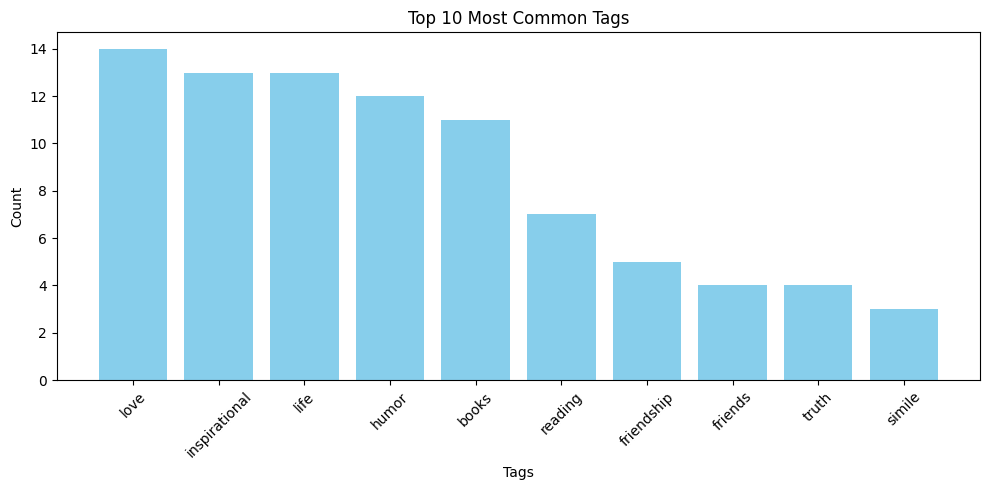

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver. support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://quotes.toscrape.com/js/")

all_quotes = []

for page_num in range(1, 100):
    WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CLASS_NAME, "quote"))
    )

    quotes = driver.find_elements(By.CLASS_NAME, "quote")

    for quote in quotes:
        text = quote.find_element(By.XPATH, ".//span[@class='text']").text
        author = quote.find_element(By.XPATH, ".//small[@class='author']").text
        tags = [tag.text for tag in quote.find_elements(By.XPATH, ".//div[@class='tags']/a[@class='tag']")]
        
        # text = quote.find_element(By.CLASS_NAME, "text").text # text, author, tag
        # author = quote.find_element(By.CLASS_NAME, "author").text
        # tags = quote.find_elements(By.CLASS_NAME, "tag")
        # tags = [tag.text for tag in tags]
        
        all_quotes.append({
            "text": text,
            "author": author,
            "tags": ", ".join(tags)
        })
        
    try:
        next_button = WebDriverWait(driver, 5).until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, "li.next > a"))
        )
        next_button.click()
    except:
        print("다음 페이지 없음")
        break
            
driver.quit()

for i, all_quote in enumerate(all_quotes, 1):
    print(f"{i}. \"{all_quote['text']}\" - {all_quote['author']} / tags: {all_quote['tags']}")

# DataFrame으로 변환
df = pd.DataFrame(all_quotes)

# 엑셀로 저장 (한글 파일명도 가능)
df.to_excel("quotes_result.xlsx", index=False)


# Eleanor Roosevelt인 경우의 명언만 추출해주세요.
# for i, all_quote in enumerate(all_quotes, 1):
#     if all_quote['author'] == 'Eleanor Roosevelt':
#         print(f"Eleanor Roosevelt:: \"{all_quote['text']}\" - {all_quote['author']} / tags: {all_quote['tags']}")


# ,로 분리된 tags를 리스트로 만들고 전체 다 합치기
all_tags = []

for tag_str in df["tags"]:
    split_tags = [tag.strip() for tag in tag_str.split(",")]  # 공백 제거 + 분리
    all_tags.extend(split_tags)  # 전체 리스트에 추가
    
from collections import Counter

tag_counts = Counter(all_tags)

import matplotlib.pyplot as plt

# 가장 많이 등장한 태그 10개만 보기
top_tags = tag_counts.most_common(10)

tags, counts = zip(*top_tags)

plt.figure(figsize=(10, 5))
plt.bar(tags, counts, color='skyblue')
plt.title("Top 10 Most Common Tags")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver. support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://quotes.toscrape.com/js/")

target_author = "Eleanor Roosevelt"

eleanor_quotes = []

page_num = 1

while True:
    time.sleep(1)
    quotes = driver.find_elements(By.CLASS_NAME, "quote")
    for quote in quotes:
        author = quote.find_element(By. CLASS_NAME, "author").text
        if author == target_author:
            text = quote.find_element(By.CLASS_NAME, "text").text
            eleanor_quotes.append(text)

    print(f"{page_num}번 페이지가 끝났습니다.")

    try:
        next_button = driver. find_element(By.CSS_SELECTOR, "li.next > a")
        next_button.click()
        page_num += 1
    except :
        print("다음 페이지 없음.")
        break
        
for i, q in enumerate(eleanor_quotes, 1):
    print(f"{i}. {q}")
    
driver.quit()

1번 페이지가 끝났습니다.
2번 페이지가 끝났습니다.
3번 페이지가 끝났습니다.
4번 페이지가 끝났습니다.
5번 페이지가 끝났습니다.
6번 페이지가 끝났습니다.
7번 페이지가 끝났습니다.
8번 페이지가 끝났습니다.
9번 페이지가 끝났습니다.
10번 페이지가 끝났습니다.
다음 페이지 없음.
1. “A woman is like a tea bag; you never know how strong it is until it's in hot water.”
2. “Do one thing every day that scares you.”


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# tag 순위를 분포표로 나타내주세요.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

df = pd.read_excel("quotes_result.xlsx")
df["tags"] = df["tags"].fillna("").apply(
lambda x: [tag.strip() for tag in x.split(",") if tag.strip() != "" ]

)

print(df["tags"])
# "Love, Life, books" -> ["Love", "life", "books"] ->


0              [change, deep-thoughts, thinking, world]
1                                  [abilities, choices]
2        [inspirational, life, live, miracle, miracles]
3                    [aliteracy, books, classic, humor]
4                          [be-yourself, inspirational]
                            ...                        
95                                [better-life-empathy]
96    [books, children, difficult, grown-ups, write,...
97                                              [truth]
98                                      [inspirational]
99                                        [books, mind]
Name: tags, Length: 100, dtype: object


In [10]:
print(sum([['a', 'b'], ['c'], ['d', 'e' ]], ['']))

['', 'a', 'b', 'c', 'd', 'e']


In [12]:
all_tags = sum(df["tags"], [])
print(all_tags)

['change', 'deep-thoughts', 'thinking', 'world', 'abilities', 'choices', 'inspirational', 'life', 'live', 'miracle', 'miracles', 'aliteracy', 'books', 'classic', 'humor', 'be-yourself', 'inspirational', 'adulthood', 'success', 'value', 'life', 'love', 'edison', 'failure', 'inspirational', 'paraphrased', 'misattributed-eleanor-roosevelt', 'humor', 'obvious', 'simile', 'friends', 'heartbreak', 'inspirational', 'life', 'love', 'sisters', 'courage', 'friends', 'simplicity', 'understand', 'love', 'fantasy', 'life', 'navigation', 'activism', 'apathy', 'hate', 'indifference', 'inspirational', 'love', 'opposite', 'philosophy', 'friendship', 'lack-of-friendship', 'lack-of-love', 'love', 'marriage', 'unhappy-marriage', 'books', 'contentment', 'friends', 'friendship', 'life', 'fate', 'life', 'misattributed-john-lennon', 'planning', 'plans', 'love', 'poetry', 'happiness', 'attributed-no-source', 'humor', 'religion', 'humor', 'comedy', 'life', 'yourself', 'children', 'fairy-tales', 'imagination', '

In [13]:
tag_counts = Counter(all_tags)
print(tag_counts)

Counter({'love': 14, 'inspirational': 13, 'life': 13, 'humor': 12, 'books': 11, 'reading': 7, 'friendship': 5, 'friends': 4, 'truth': 4, 'simile': 3, 'attributed-no-source': 3, 'death': 3, 'writing': 3, 'thinking': 2, 'classic': 2, 'paraphrased': 2, 'courage': 2, 'philosophy': 2, 'religion': 2, 'yourself': 2, 'children': 2, 'music': 2, 'learning': 2, 'dumbledore': 2, 'library': 2, 'hope': 2, 'change': 1, 'deep-thoughts': 1, 'world': 1, 'abilities': 1, 'choices': 1, 'live': 1, 'miracle': 1, 'miracles': 1, 'aliteracy': 1, 'be-yourself': 1, 'adulthood': 1, 'success': 1, 'value': 1, 'edison': 1, 'failure': 1, 'misattributed-eleanor-roosevelt': 1, 'obvious': 1, 'heartbreak': 1, 'sisters': 1, 'simplicity': 1, 'understand': 1, 'fantasy': 1, 'navigation': 1, 'activism': 1, 'apathy': 1, 'hate': 1, 'indifference': 1, 'opposite': 1, 'lack-of-friendship': 1, 'lack-of-love': 1, 'marriage': 1, 'unhappy-marriage': 1, 'contentment': 1, 'fate': 1, 'misattributed-john-lennon': 1, 'planning': 1, 'plans':

In [16]:
# tag_counts = Counter(all_tags)
tag_series = pd.Series(all_tags)
tag_counts = tag_series.value_counts()
print(tag_counts)

love             14
inspirational    13
life             13
humor            12
books            11
                 ..
difficult         1
grown-ups         1
write             1
writers           1
mind              1
Name: count, Length: 137, dtype: int64


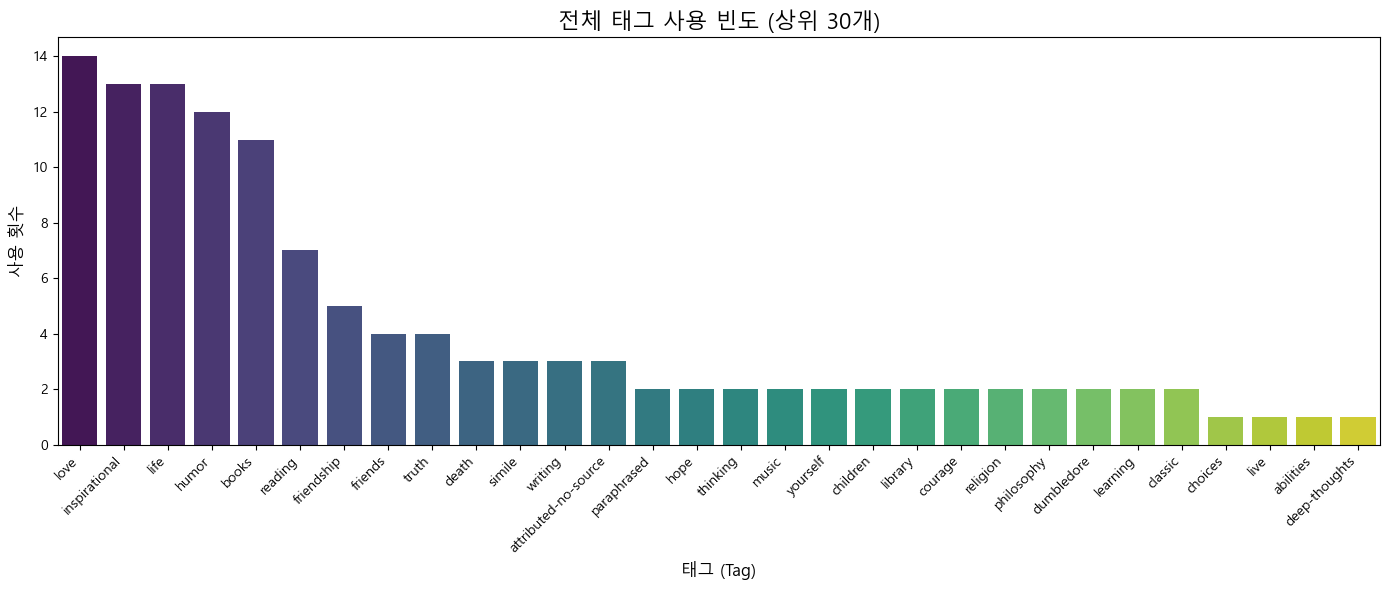

In [24]:
from matplotlib import rcParams

plt.rcParams ['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

top_tags = tag_counts.head(30)
plt.figure(figsize=(14, 6))
sns.barplot(x=top_tags.index, y=top_tags.values, hue=top_tags.index, palette="viridis", legend=False)

plt.title("전체 태그 사용 빈도 (상위 30개)", fontsize=16)
plt.xlabel("태그 (Tag)", fontsize=12)
plt.ylabel("사용 횟수", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout ()
plt.show()

In [25]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [26]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


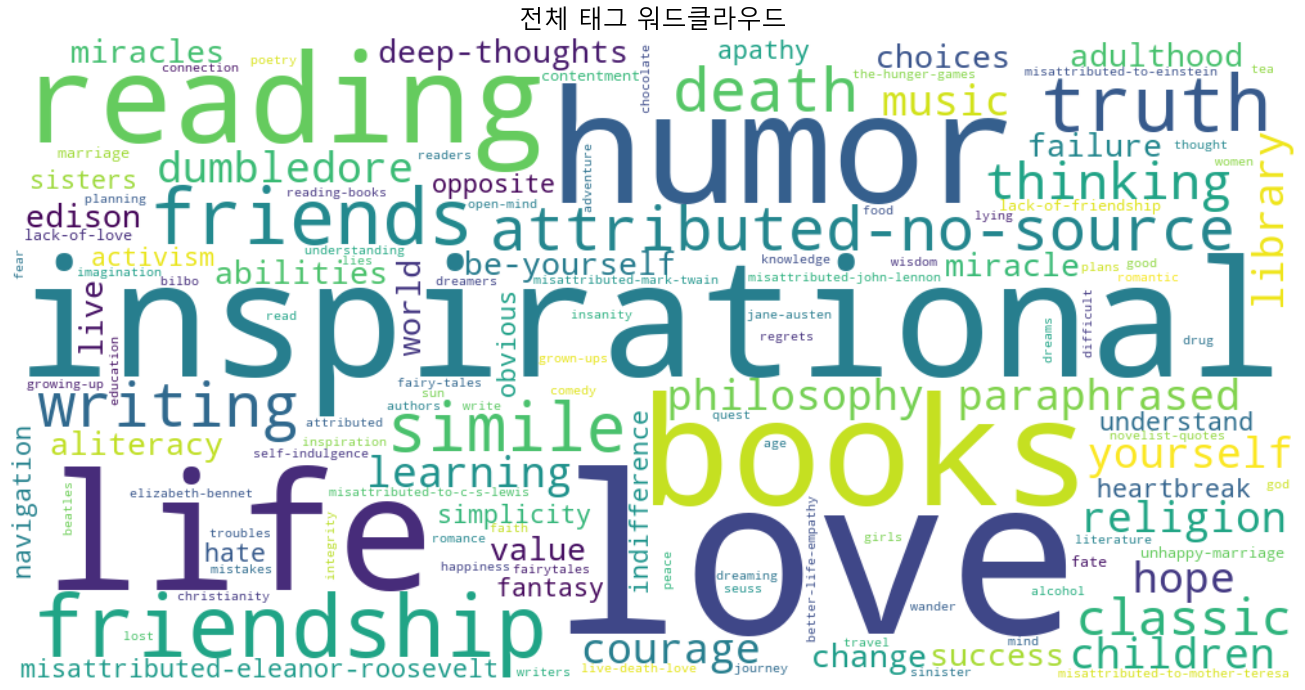

In [28]:
from wordcloud import WordCloud

tag_counts = Counter(all_tags)

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(tag_counts)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("전체 태그 워드클라우드", fontsize=18)
plt.tight_layout()
plt.show()

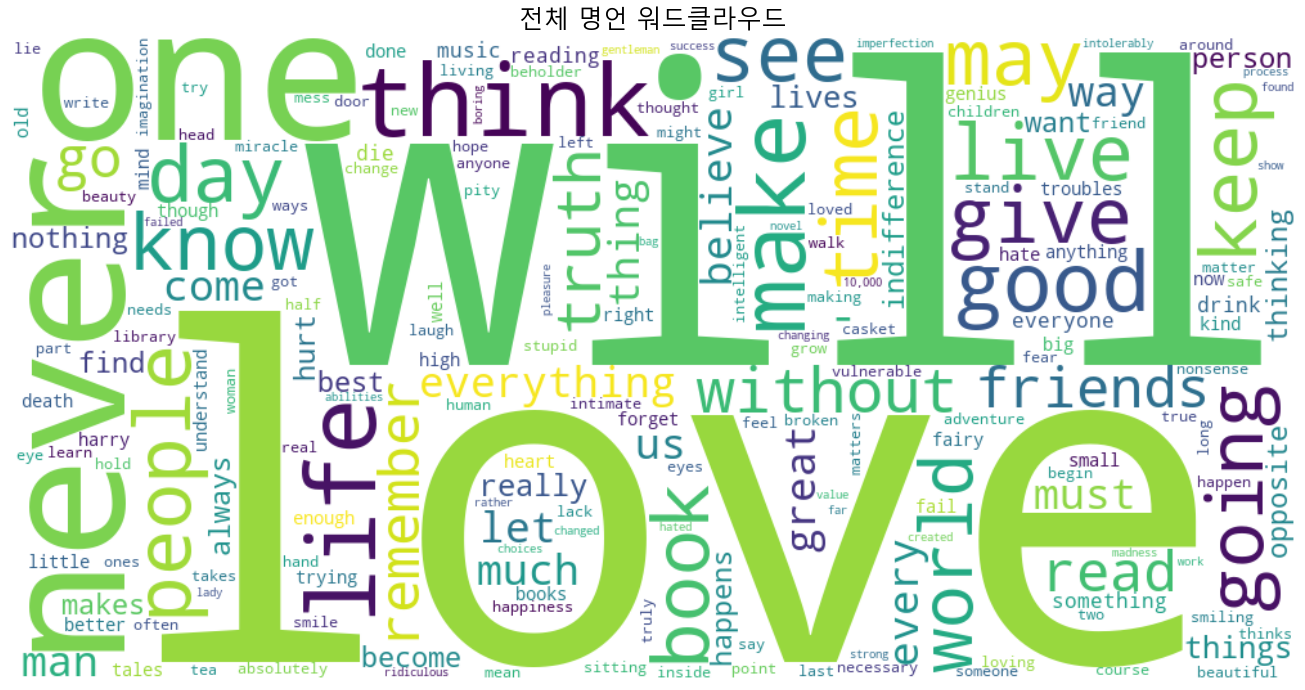

In [48]:
# tag 순위를 분포표로 나타내주세요.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import string
import re

df = pd.read_excel("quotes_result.xlsx")

def clean_word(word):
    word = word.lower()
    word = re.sub(r"^[\"'“”‘’]*", "", word)
    word = re.sub(r"[\"'“”‘’.,:;!?)*]+$", "", word)
    return word.strip()

custom_stopwords = set([clean_word(w) for w in STOPWORDS])

df["text"] = df["text"].fillna("").apply(
    lambda x: [clean_word(tag) for tag in x.split() if tag.strip()]
)

all_texts = sum(df["text"], [])

filtered_texts = [word for word in all_texts if word not in custom_stopwords]
text_counts = Counter(filtered_texts)

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(text_counts)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("전체 명언 워드클라우드", fontsize=18)
plt.tight_layout()
plt.show()

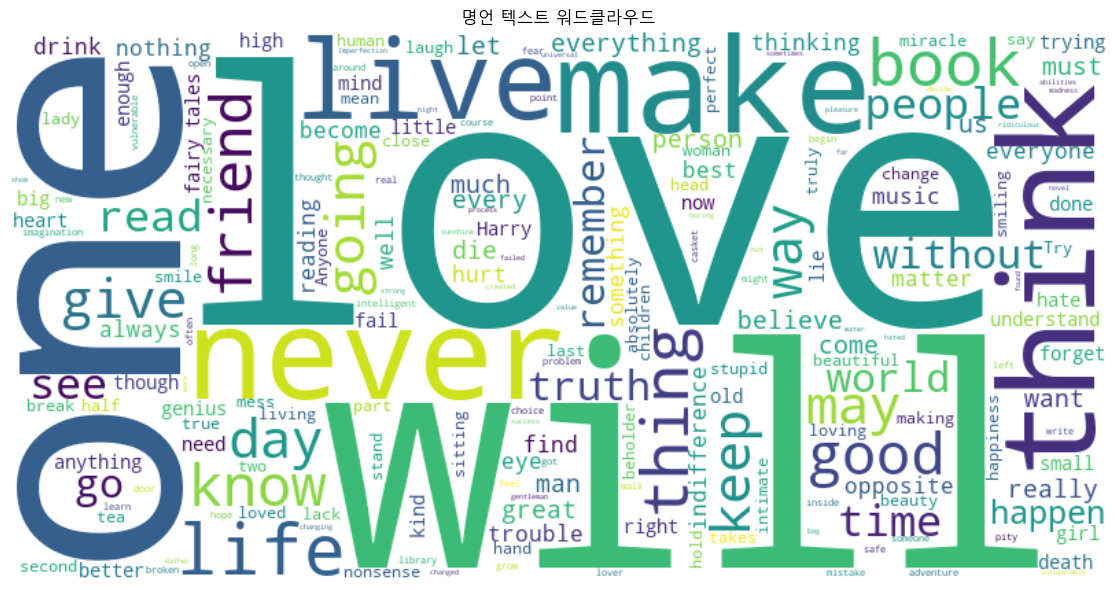

In [51]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver. support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://quotes.toscrape.com/js/")

all_quotes = []

while True:
    time.sleep(1)
    quotes = driver.find_elements(By.CLASS_NAME, "quote")
    for quote in quotes:
        text = quote.find_element(By.CLASS_NAME, "text").text
        author = quote.find_element(By.CLASS_NAME, "author").text
        tags = [tag. text for tag in quote.find_elements(By.CLASS_NAME, "tag") ]
        all_quotes.append({
        "quote": text,
        "author": author,
        "tags": tags})
    try:
        next_button = driver. find_element(By.CSS_SELECTOR, "li.next > a")
        next_button.click()
    except :
        break
    
driver.quit()

text_data = " ".join([quote["quote"] for quote in all_quotes]) # quote : text

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(12, 6))
plt. imshow(wordcloud, interpolation='bilinear') # bilinear, nearest, bicubic
plt.axis('off')
plt.title("명언 텍스트 워드클라우드")
plt.tight_layout ()
plt.show()